In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi,sqrt
from numpy import exp
from scipy.stats import norm
from scipy.optimize import fsolve

In [2]:
#param: theta, f, kappa
# rho = 2.1 
kappa_tilde = 1
f = 0.25
theta = 0.6



w_mean = theta/f

def Q_critic(list_x,f,theta,kappa_tilde): #x=w/w_mean
    
    #--------------get B----------------------
    #1- Get M_tilde via Eq. (22)
    def p(eps): #returns f if eps = 1, and 1-f if eps = -1
        return f*eps + (1-eps)/2
    func = lambda x: np.sum([p(eps) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])
    M_tilde_initial_guess = 0.5
    M_tilde = fsolve(func, M_tilde_initial_guess)
    # Plot it
#     absc = np.linspace(-0.5, 100, 10000)
#     plt.plot(absc, [func(el) for el in absc])
#     plt.xlabel("M_tilde")
#     plt.ylabel("expression value")
#     plt.grid()
#     plt.show()
#     print("The solution is M_tilde = %f" % M_tilde)
#     print("at which the value of the expression is %f" % func(M_tilde))
    
    #2- Get tau_eps via Eq. (15)
    def tau(eps):
        return -kappa_tilde + eps*f*M_tilde
    
    #3- Get B via Eq. (27)
    func = lambda x: ((1+x**2)*H(x)-x*G(x))/H(x) - \
                    np.sum([(f*eps + (1-eps)/2) * H(eps) for eps in [-1,1]]) / \
                            np.sum([(f*eps + (1-eps)/2) * ((1+tau(eps)**2)* H(tau(eps)) - tau(eps)*G(tau(eps))) for eps in [-1,1]])
    B_initial_guess = 0.5
    B = fsolve(func, B_initial_guess)
    # Plot it
#     absc = np.linspace(-0.5, 100, 10000)
#     plt.plot(absc, [func(el) for el in absc])
#     plt.xlabel("B")
#     plt.ylabel("expression value")
#     plt.grid()
#     plt.show()
    print("The solution is B = %f" % B)
#     print("at which the value of the expression is %f" % func(B))
    
    #-----------------------------------------
    
    #Get w_s
    w_s = get_w_s(B)
    
    #Return Q(x) where x = w/w_mean
    return [H(-B) * (x==0) + 1/(sqrt(2*pi) * w_s) * exp(-1/(2* w_s**2) * (w_mean*x + B * w_s)**2) * (x>0) for x in list_x]

def get_w_s(B):
    return w_mean / (G(B) - B*H(B))
  
def H(x):
    return 1 - norm.cdf(x, loc=0, scale=1)

def G(x):
    return exp(-x**2/2)/sqrt(2*pi)


def Q_non_critic(alpha,list_x):
    #get Q_hat
    
    #Get q_hat
    
    #Get M_hat
    return

The solution is B = 1.146774


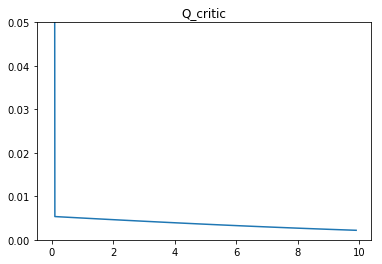

In [3]:
list_w = [i/10 for i in range(100)]
plt.plot(list_w,Q_critic(list_w,f,theta,kappa_tilde) )
plt.title('Q_critic')
plt.ylim(0,0.05)
plt.show()

In [4]:


# func = lambda x: np.sum([(f*eps + (1-eps)/2) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])


# # Plot it
# x = np.linspace(-0.5, 100, 10000)
# plt.plot(x, [func(el) for el in x])
# plt.xlabel("x")
# plt.ylabel("expression value")
# plt.grid()
# plt.show()

# # Use the numerical solver to find the roots

# x_initial_guess = 0.5
# x_solution = fsolve(func, x_initial_guess)

# print("The solution is x = %f" % x_solution)
# print("at which the value of the expression is %f" % func(x_solution))

In [5]:
def y_2(B):
    return (G(B)-B*H(B)) / sqrt((1+B**2)*H(B) - B*G(B))

def get_z_as_y(y):
    func = lambda z: f*(G(-y+z) - (-y+z)*H(-y+z)) - (1-f)*(G(-y-z) - (-y-z)*H(-y-z))
    z_value_initial_guess = 0.5
    z_value = fsolve(func, z_value_initial_guess)
#     print(z_value)
    return z_value

def F_1(y):
    z = get_z_as_y(y)
    return (f*H(-y+z) + (1-f)*H(-y+z)) / \
        (f*((1+(-y+z)**2)*H(-y+z) - (-y+z)*G(-y+z)) +\
         (1-f)*((1+(-y-z)**2)*H(-y-z) - (-y-z)*G(-y-z)))
         
def y_1(B): 
    image = 1 + B**2 - B*G(B)/H(B)
    func = lambda y: F_1(y) - image  #Computing the invert of F_1
    y_1_initial_guess = 0.5
    y_1_value = fsolve(func, y_1_initial_guess)
#     print(y_1_value)
    return y_1_value

def rho(B):
    return y_1(B) / y_2(B)

# B_list = np.linspace(0, 5, 100)
# plt.plot(B_list, [rho(el) for el in B_list])
# plt.show()


def B_from_rho(rho_value):
    func = lambda B: rho_value - rho(B)
    B_initial_guess = 0.5
    B_value = fsolve(func, B_initial_guess)
#     print(B_value)
    return B_value

def get_alpha_c(B,y,z):
    tau_minus = -y+z
    tau_plus = -y-z
    return H(B) / (f*H(tau_minus) + (1-f)*H(tau_plus))


def get_W_s(B):
    return (theta/f) / (G(B) - B*H(B)) #W_mean = theta/f

def get_p(W,B):
    W_s = get_W_s(B)
    return H(-B)*(W==0)  + \
        1/(sqrt(2*pi) * W_s) * exp(-1/(2* W_s**2) * (W + B * W_s)**2) * (W>0)



In [6]:
#Based on http://www.cell.com/neuron/fulltext/S0896-6273(04)00528-8
#with its annex http://www.cell.com/cms/attachment/572560/4239133/mmc1.pdf


#Parameters
N = 800
f = 0.25
theta_prime = 3 #theta of the 1st article = theta_2/N (where theta_2 is from the 2nd article)
theta = N*theta_prime #i.e. T of our article
rho_exp_list = [0,1,2,3]



proba_all = []
for rho_exp in rho_exp_list:
    print("--------------Rho = "+str(rho_exp)+"------------------")
    B = B_from_rho(rho_exp)
    print("B =",B)
    print("Fraction of strictly positive synapses: H(B) =",H(B))
    print("Fraction of silent synapses: H(-B) =",H(-B))
    y = y_1(B)


    # kappa_tilde = y*sqrt(N)
    # print("kappa_tilde =",kappa_tilde)
    # list_w = [i/10 for i in range(100)]
    # plt.plot(list_w,Q_critic(list_w,f,theta,kappa_tilde) )
    # plt.title('Q_critic')
    # plt.show()

    z = get_z_as_y(y)
    alpha_c = get_alpha_c(B,y,z)
    print("alpha_c =",alpha_c)



    absc = [i/100 for i in range(1000)]
    proba = [get_p(x*theta/f,B) for x in absc] #x=w/w_mean=W/W_mean  where W_mean = theta/f
    proba_all.append(proba)

--------------Rho = 0------------------
B = [-0.58031782]
H(B) = [ 0.71914984]
Fraction of silent synapses: H(-B) = [ 0.28085016]
alpha_c = [ 1.73018146]
--------------Rho = 1------------------
B = [ 0.06200691]
H(B) = [ 0.47527866]
Fraction of silent synapses: H(-B) = [ 0.52472134]
alpha_c = [ 0.80881635]
--------------Rho = 2------------------
B = [ 0.47818868]
H(B) = [ 0.31625796]
Fraction of silent synapses: H(-B) = [ 0.68374204]
alpha_c = [ 0.46862752]
--------------Rho = 3------------------
B = [ 0.76136214]
H(B) = [ 0.2232204]
Fraction of silent synapses: H(-B) = [ 0.7767796]
alpha_c = [ 0.30846764]


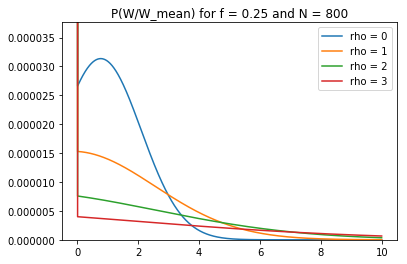

In [9]:
for i in range(len(rho_exp_list)):
    plt.plot(absc,proba_all[i],label="rho = "+str(rho_exp_list[i]))
plt.legend()
# plt.ylim(0,0.00005)
y_max_plot = np.max(proba_all[0][1:])
plt.ylim(0,y_max_plot*1.2)
plt.title('P(W/W_mean) for f = '+str(f)+' and N = '+str(N))
plt.show()

In [14]:
#Get Figure 2 of our article

#Parameters
N = 800
f_list = [0.01,0.1,0.25,0.5]
theta_prime = 3 #theta of the 1st article = theta_2/N (where theta_2 is from the 2nd article)
theta = N*theta_prime #i.e. T of our article
rho_exp_list = [i/5 for i in range(40)]

connection_proba = []
for f in f_list:
    print("f =",f)
    connection_proba_f = []
    for rho_exp in rho_exp_list:
        B = B_from_rho(rho_exp)
#         print("Fraction of strictly positive synapses: H(B) =",H(B))
        connection_proba_f.append(H(B))
    connection_proba.append(connection_proba_f)

/home/vincent/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


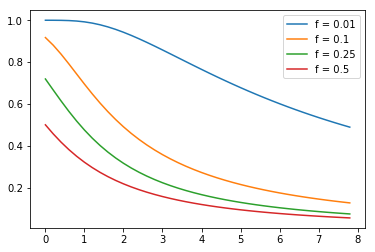

In [15]:
for i in range(len(connection_proba)):
    plt.plot(rho_exp_list,connection_proba[i],label="f = "+str(f_list[i]))
plt.legend()
# plt.ylim(0,0.00005)
# y_max_plot = np.max(proba_all[0][1:])
# plt.ylim(0,y_max_plot*1.2)
# plt.title('Connection probability, for N = '+str(N))
plt.show()